In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

In [31]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
datos = pd.read_csv(url, header=None)
print("Dimensiones del conjunto de datos: ", datos.shape)
print("Primeras 5 filas del conjunto de datos: ")
datos.head()

Dimensiones del conjunto de datos:  (303, 14)
Primeras 5 filas del conjunto de datos: 


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [32]:
print("Cantidad de valores nulos por columna: ")
print(datos.isnull().sum())

Cantidad de valores nulos por columna: 
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64


In [33]:
datos.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11     object
12     object
13      int64
dtype: object

In [34]:
# Borrar datos nulos por columna
#datos.dropna(inplace=True)

In [35]:
# Seleccionamos las variables independientes (X) y la variable dependiente (y)
X = datos.iloc[:, :-1] # Todas las columnas menos la última
y = datos.iloc[:, -1] # Última columna

X.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [36]:
#X[['ca', 'thal']].dtypes
X[['ca', 'thal']]
X['ca'] = X['ca'].replace('?', 0.0)
X['thal'] = X['thal'].replace('?', 0.0)

#X.dtypes

X['ca'] = X['ca'].astype('float64')
X['thal'] = X['thal'].astype('float64')

X.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
dtype: object

In [37]:
y.head()

0    0
1    2
2    1
3    0
4    0
Name: 13, dtype: int64

In [38]:
# Conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
modelo = DecisionTreeClassifier()
modelo.fit(X_train, y_train)

DecisionTreeClassifier()

In [39]:
# Exportar modelo
joblib.dump(modelo, 'arbol_decision_2.pkl')

['arbol_decision_2.pkl']

In [40]:
# Cargar el modelo exportado
modelo_cargado = joblib.load('arbol_decision_2.pkl')

In [41]:
# Predicciones
y_pred = modelo_cargado.predict(X_test)

In [43]:
# Añadir las columnas de predicción y valor real al conjunto de datos de prueba
X_test_con_prediccion = X_test.copy()
X_test_con_prediccion['prediccion'] = y_pred
X_test_con_prediccion['valor real'] = y_test

In [44]:
# Visualizar las predicciones junto a la variable objetivo
print("Predicciones vs Variable objetivo")
print(X_test_con_prediccion.head(10))


Predicciones vs Variable objetivo
      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
179  53.0  1.0  3.0     130.0  246.0  1.0      2.0    173.0    0.0      0.0   
228  54.0  1.0  4.0     110.0  206.0  0.0      2.0    108.0    1.0      0.0   
111  56.0  1.0  4.0     125.0  249.0  1.0      2.0    144.0    1.0      1.2   
246  58.0  1.0  4.0     100.0  234.0  0.0      0.0    156.0    0.0      0.1   
60   51.0  0.0  4.0     130.0  305.0  0.0      0.0    142.0    1.0      1.2   
9    53.0  1.0  4.0     140.0  203.0  1.0      2.0    155.0    1.0      3.1   
119  65.0  1.0  4.0     135.0  254.0  0.0      2.0    127.0    0.0      2.8   
223  53.0  1.0  4.0     123.0  282.0  0.0      0.0     95.0    1.0      2.0   
268  40.0  1.0  4.0     152.0  223.0  0.0      0.0    181.0    0.0      0.0   
33   59.0  1.0  4.0     135.0  234.0  0.0      0.0    161.0    0.0      0.5   

     slope   ca  thal  prediccion  valor real  
179    1.0  3.0   3.0           0           0  


In [46]:
# Metricas de evaluación del modelo
metrica = accuracy_score(y_test, y_pred)
print("Exactitud del modelo: ", round(metrica, 2))
print("Reporte de clasificación: ")
print(classification_report(y_test, y_pred))

Exactitud del modelo:  0.48 %
Reporte de clasificación: 
              precision    recall  f1-score   support

           0       0.73      0.83      0.77        29
           1       0.25      0.17      0.20        12
           2       0.27      0.33      0.30         9
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         4

    accuracy                           0.48        61
   macro avg       0.25      0.27      0.25        61
weighted avg       0.44      0.48      0.45        61



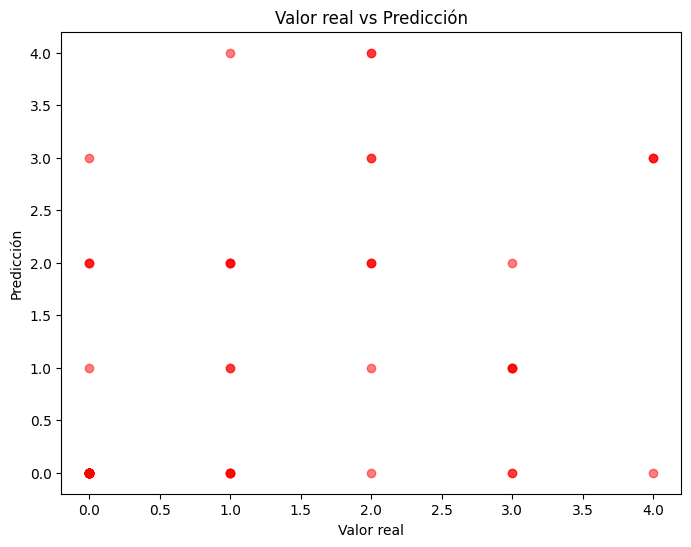

In [48]:
# Visualización del árbol de decisión
plt.figure(figsize=(8, 6))
plt.scatter(X_test_con_prediccion['valor real'], X_test_con_prediccion['prediccion'], color='red', alpha=0.5)
plt.xlabel('Valor real')
plt.ylabel('Predicción')
plt.title('Valor real vs Predicción')
plt.show()